# Linear Regression Machine Learning Project for House Price Prediction

### Import Libraries

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Importing Data and Checking out.

In [44]:
import pandas as pd

# Creating a mock dataset based on the provided data structure
data = {
    'Avg. Area Income': [79545.458574, 79248.642455, 61287.067179, 63345.240046, 59982.197226],
    'Avg. Area House Age': [5.682861, 6.002900, 5.865890, 7.188236, 5.040555],
    'Avg. Area Number of Rooms': [7.009188, 6.730821, 8.512727, 5.586729, 7.839388],
    'Avg. Area Number of Bedrooms': [4.09, 3.09, 5.13, 3.26, 4.23],
    'Area Population': [23086.800503, 40173.072174, 36882.159400, 34310.242831, 26354.109472],
    'Price': [1.059034e+06, 1.505891e+06, 1.058988e+06, 1.260617e+06, 6.309435e+05],
    'Address': [
        '208 Michael Ferry Apt. 674\nLaurabury, NE 3701...',
        '188 Johnson Views Suite 079\nLake Kathleen, CA...',
        '9127 Elizabeth Stravenue\nDanieltown, WI 06482...',
        'USS Barnett\nFPO AP 44820',
        'USNS Raymond\nFPO AE 09386'
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('USA_Housing.csv', index=False)


In [45]:
import pandas as pd

# Load the dataset (replace with the actual path if different)
HouseDF = pd.read_csv('USA_Housing.csv')

# Check the first few rows
HouseDF.head()

# Get information about the dataset
HouseDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5 non-null      float64
 1   Avg. Area House Age           5 non-null      float64
 2   Avg. Area Number of Rooms     5 non-null      float64
 3   Avg. Area Number of Bedrooms  5 non-null      float64
 4   Area Population               5 non-null      float64
 5   Price                         5 non-null      float64
 6   Address                       5 non-null      object 
dtypes: float64(6), object(1)
memory usage: 412.0+ bytes


In [46]:
HouseDF.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000e+00
mean,68681.721096,5.956088,7.135771,3.960000,32161.276876,1.103095e+06
std,9855.471464,0.781244,1.114745,0.822435,7196.578442,3.216643e+05
min,59982.197226,5.040555,5.586729,3.090000,23086.800503,6.309435e+05
25%,61287.067179,5.682861,6.730821,3.260000,26354.109472,1.058988e+06
50%,63345.240046,5.865890,7.009188,4.090000,34310.242831,1.059034e+06
75%,79248.642455,6.002900,7.839388,4.230000,36882.159400,1.260617e+06
max,79545.458574,7.188236,8.512727,5.130000,40173.072174,1.505891e+06


In [47]:
HouseDF.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

## Exploratory Data Analysis for House Price Prediction

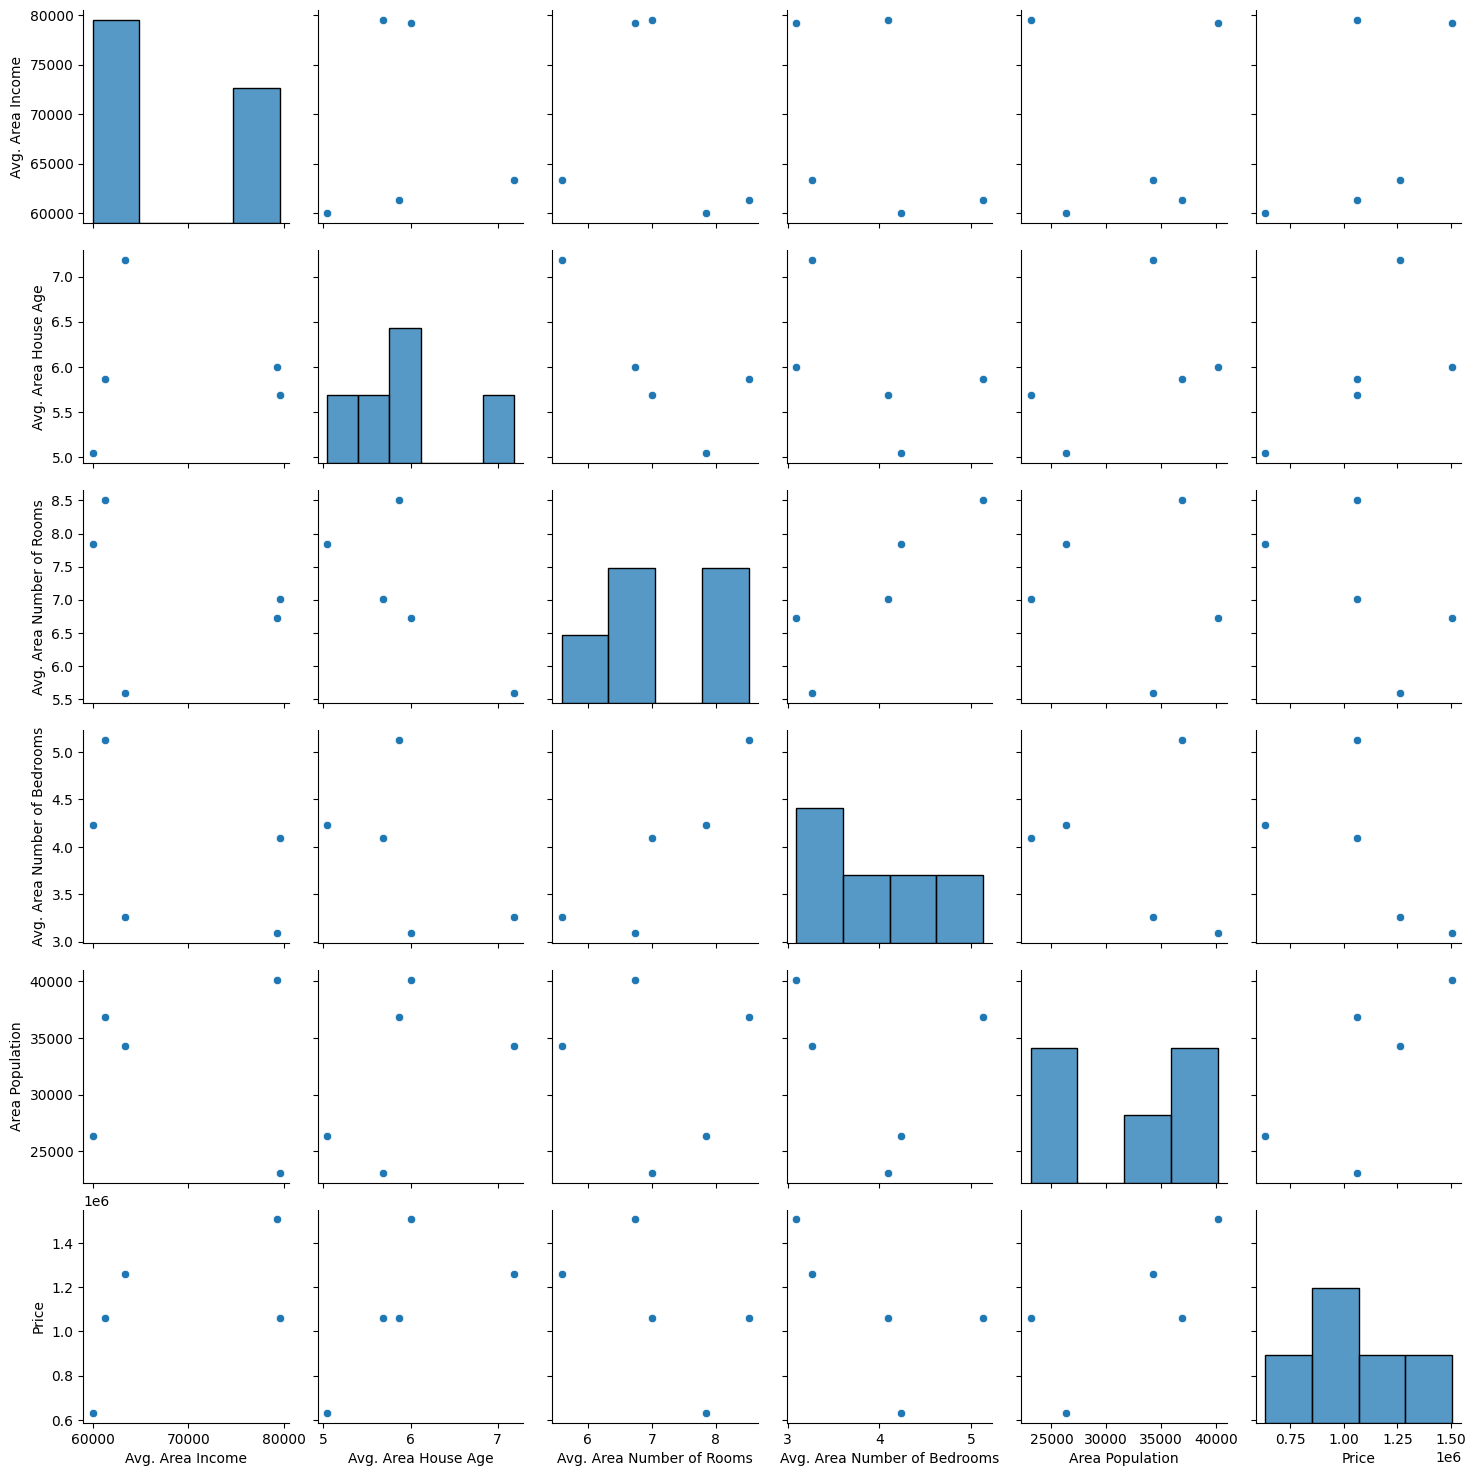

In [48]:
sns.pairplot(HouseDF)

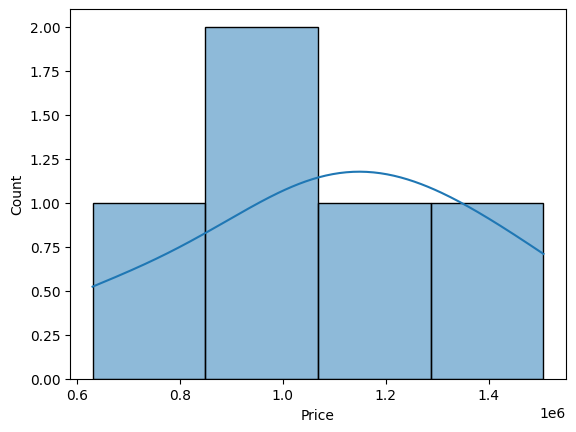

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of 'Price' column with KDE (Kernel Density Estimate)
sns.histplot(HouseDF['Price'], kde=True)
plt.show()


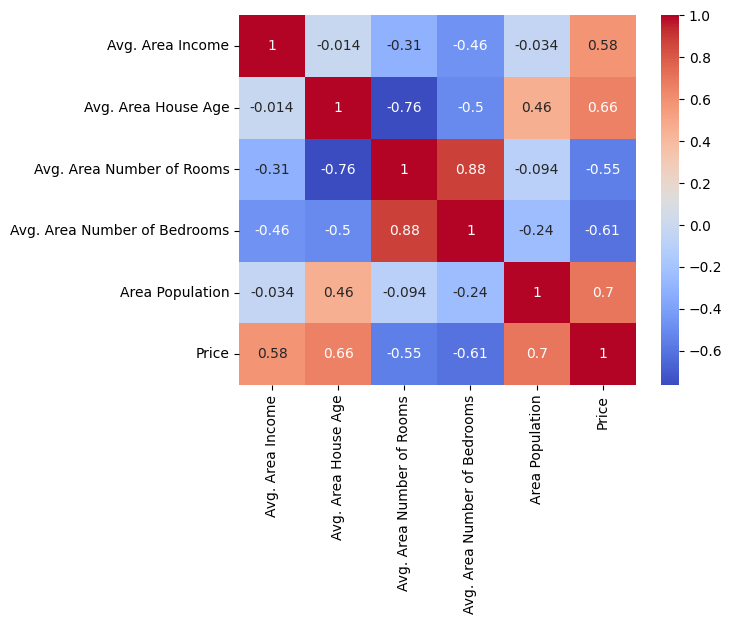

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the 'Address' column for correlation calculation
numeric_data = HouseDF.select_dtypes(include=['float64'])

# Generate the heatmap for the correlation matrix of numeric columns
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()


## Training a Linear Regression Model

### X and y List

In [51]:
X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]

y = HouseDF['Price']

### Split Data into Train, Test

In [52]:
from sklearn.model_selection import train_test_split

# X contains the feature data (e.g., square footage, number of bedrooms, etc.)
# y contains the target data (e.g., house price)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Now, you can train your model using the training set
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

# Train the model
lm.fit(X_train, y_train)

# Predict using the test set
y_pred = lm.predict(X_test)

# You can evaluate your model using metrics like Mean Absolute Error or R² score.


## Creating and Training the LinearRegression Model

In [53]:
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
lm = LinearRegression()

# Fit the model to training data (X_train and y_train)
lm.fit(X_train, y_train)

# Use the trained model to make predictions
predictions = lm.predict(X_test)


## LinearRegression Model Evaluation

In [54]:
print(lm.intercept_)

842583.2793729096


In [55]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,34.226461
Avg. Area House Age,0.025640
Avg. Area Number of Rooms,-0.056260
Avg. Area Number of Bedrooms,-0.035667
Area Population,-51.006617


## Predictions from our Linear Regression Model

In [56]:
predictions = lm.predict(X_test)

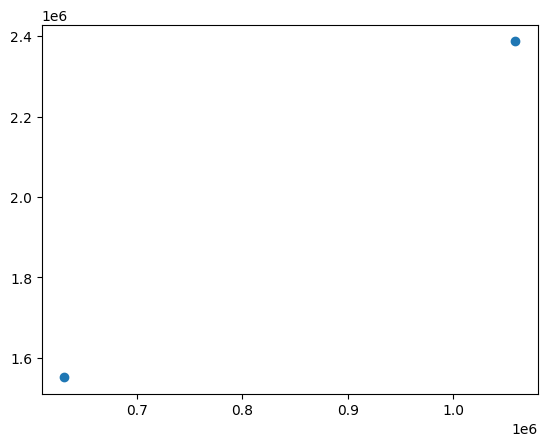

In [57]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data is in line shape, which means our model has done good predictions.

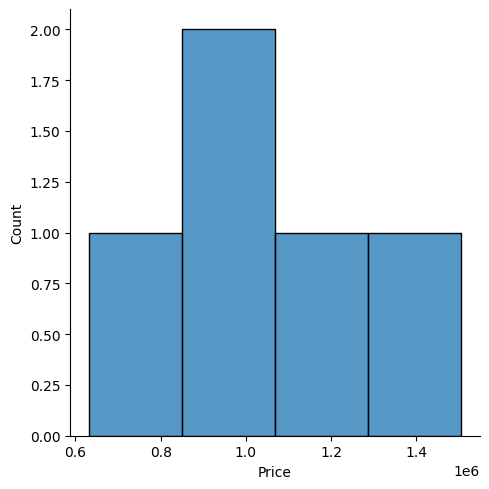

In [58]:
import seaborn as sns
sns.displot(HouseDF['Price'])


In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

## Regression Evaluation Metrics

In [59]:
from sklearn import metrics

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1124456.2432740289
MSE: 1306047456542.8308
RMSE: 1142824.3331951026
